<a href="https://colab.research.google.com/github/katgom72/projekt_UM/blob/main/recenzje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Ladowanie zbioru danych IMDB
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [2]:
import numpy as np
from keras import models
from keras import layers
import matplotlib.pyplot as plt
from keras import optimizers
from keras import losses
from keras import metrics

In [3]:
# Zmiana danych na wektory 0 i 1
# Kodowanie sekwencji wartosci całkowitoliczbowych do postaci macierzy wartosci binarnych
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [4]:
# Zamiana etykiet próbek na wektory
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [5]:
#wyswietlanie przykladowej recenzji filmu

# Ładowanie słownika mapującego słowa na liczby całkowite
word_index = imdb.get_word_index()

# Odwracanie słownika, aby mapować liczby całkowite na słowa
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# Konwertowanie recenzji z liczby całkowitej na tekst
def decode_review(encoded_text):
    # Dekodowanie recenzji, pomijając pierwsze trzy indeksy, które są zarezerwowane
    decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded_text])
    return decoded_review

# Wyświetlenie jednej z recenzji
sample_review = decode_review(train_data[0])
print("Przykładowa recenzja z danych IMDB:")
print(sample_review)


1641221/1641221 [==============================] - 0s 0us/step
Przykładowa recenzja z danych IMDB:
? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the wh

In [6]:
#Definicja modelu
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
#Kompilacja modelu
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [8]:
#Konfiguracja optymalizatora
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [9]:
#Korzystanie z wlasnych funkcji straty i metryki
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [10]:
# Tworzenie zbioru walidacyjnego
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [12]:
history = model.fit(x_train,
                    y_train,
                    epochs=5,
                    batch_size=512,
                    validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/5
49/49 [==============================] - 4s 72ms/step - loss: 0.4572 - binary_accuracy: 0.8170 - val_loss: 0.3046 - val_binary_accuracy: 0.9015
Epoch 2/5
49/49 [==============================] - 1s 28ms/step - loss: 0.2709 - binary_accuracy: 0.9048 - val_loss: 0.2079 - val_binary_accuracy: 0.9352
Epoch 3/5
49/49 [==============================] - 1s 28ms/step - loss: 0.2124 - binary_accuracy: 0.9242 - val_loss: 0.1726 - val_binary_accuracy: 0.9441
Epoch 4/5
49/49 [==============================] - 1s 29ms/step - loss: 0.1786 - binary_accuracy: 0.9373 - val_loss: 0.1454 - val_binary_accuracy: 0.9551
Epoch 5/5
782/782 [==============================] - 2s 3ms/step - loss: 0.2988 - binary_accuracy: 0.8824
[0.29877662658691406, 0.8823599815368652]


In [13]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

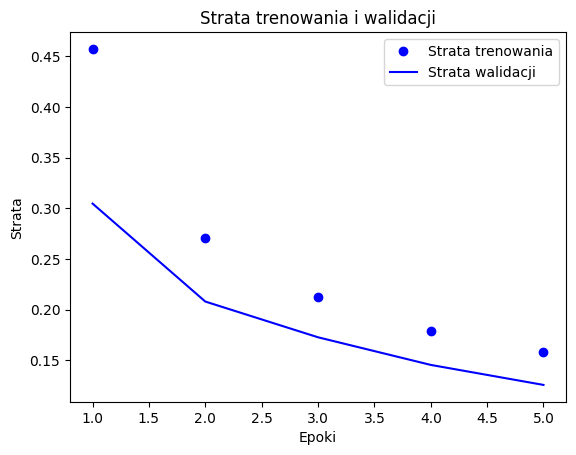

In [14]:
import matplotlib.pyplot as plt
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()

plt.show()

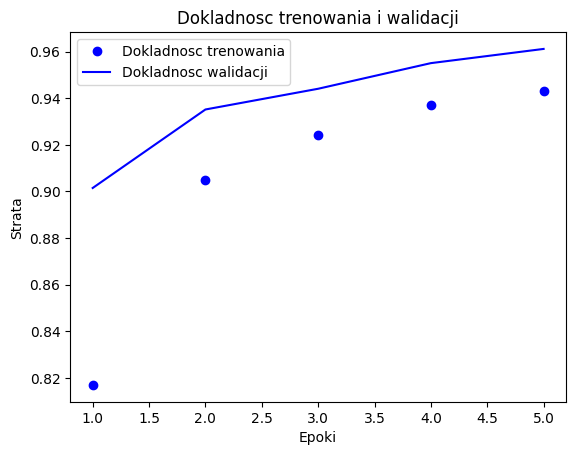

In [15]:
plt.clf()
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
plt.plot(epochs, acc, 'bo', label='Dokladnosc trenowania')
plt.plot(epochs, val_acc, 'b', label='Dokladnosc walidacji')
plt.title('Dokladnosc trenowania i walidacji')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()
plt.show()

In [16]:
model.save('model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
from keras.preprocessing import sequence
from keras.models import load_model
import numpy as np
# Przygotowanie przykładowej recenzji
sample_review = "This movie is awesome! The story is really cool, and the actors are amazing. It's a must-watch for sure!"

# Tokenizacja tekstu (przekształcenie tekstu na sekwencję liczb)
word_index = imdb.get_word_index()  # Pobranie słownika z bazy danych IMDB
words = sample_review.split()  # Podział recenzji na słowa
tokens = [word_index[word] if word in word_index and word_index[word] < 10000 else 0 for word in words]  # Przekształcenie słów na tokeny
tokens = sequence.pad_sequences([tokens], maxlen=10000)  # Dopasowanie długości sekwencji do wymiarów modelu

# Predykcja sentymentu
prediction = model.predict(np.array(tokens))

# Wyświetlenie wyniku
print(f'Przewidywany sentyment (0 - negatywny, 1 - pozytywny): {prediction[0][0]}')

1/1 [==============================] - 0s 107ms/step
Przewidywany sentyment (0 - negatywny, 1 - pozytywny): 0.6153160929679871
